<a href="https://colab.research.google.com/github/danaor1/projectCSC212/blob/main/Reports/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
# Step 2: Upload file
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset-uci.csv")
print(df.head())

Saving dataset-uci.csv to dataset-uci.csv
   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High D

In [22]:
# Step 3: Function to run Decision Tree safely
def run_decision_tree(X, y, test_size=0.2, criterion="gini"):
    """
    Function to apply Decision Tree on dataset with
    Confusion Matrix and Tree visualization.

    Parameters:
    - X: Features (DataFrame)
    - y: Target column (Series)
    - test_size: Test set proportion
    - criterion: Split criterion ('gini' or 'entropy')
    """

    # 1️⃣ Convert categorical columns to numeric (if any)
    X_numeric = pd.get_dummies(X)

    # 2️⃣ Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_numeric, y, test_size=test_size, random_state=42
    )

    # 3️⃣ Create Decision Tree model
    clf = DecisionTreeClassifier(
        criterion=criterion,
        random_state=42,
        max_depth=3
    )
    clf.fit(X_train, y_train)

    # 4️⃣ Predict test set
    y_pred = clf.predict(X_test)

    # 5️⃣ Compute accuracy and confusion matrix
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"🔹 Split criterion: {criterion}")
    print(f"🔹 Train/Test split: {int((1-test_size)*100)}% / {int(test_size*100)}%")
    print(f"✅ Accuracy: {acc:.3f}")
    print("🧾 Confusion Matrix:\n", cm)
    print("-"*60)

    # 6️⃣ Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Decision Tree ({criterion}) - {int((1-test_size)*100)}% Train")
    plt.show()

    # 7️⃣ Plot decision tree
    plt.figure(figsize=(20,10))
    plot_tree(
        clf,
        filled=True,
        feature_names=X_numeric.columns,
        class_names=["Present","Absent"],
        fontsize=8
    )
    plt.title(f"Decision Tree Structure ({criterion}) - {int((1-test_size)*100)}% Train")
    plt.show()

    return acc


🔹 Split criterion: gini
🔹 Train/Test split: 90% / 10%
✅ Accuracy: 0.656
🧾 Confusion Matrix:
 [[12  4]
 [ 7  9]]
------------------------------------------------------------


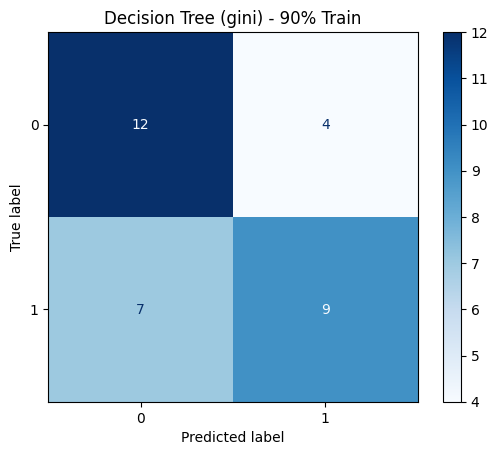

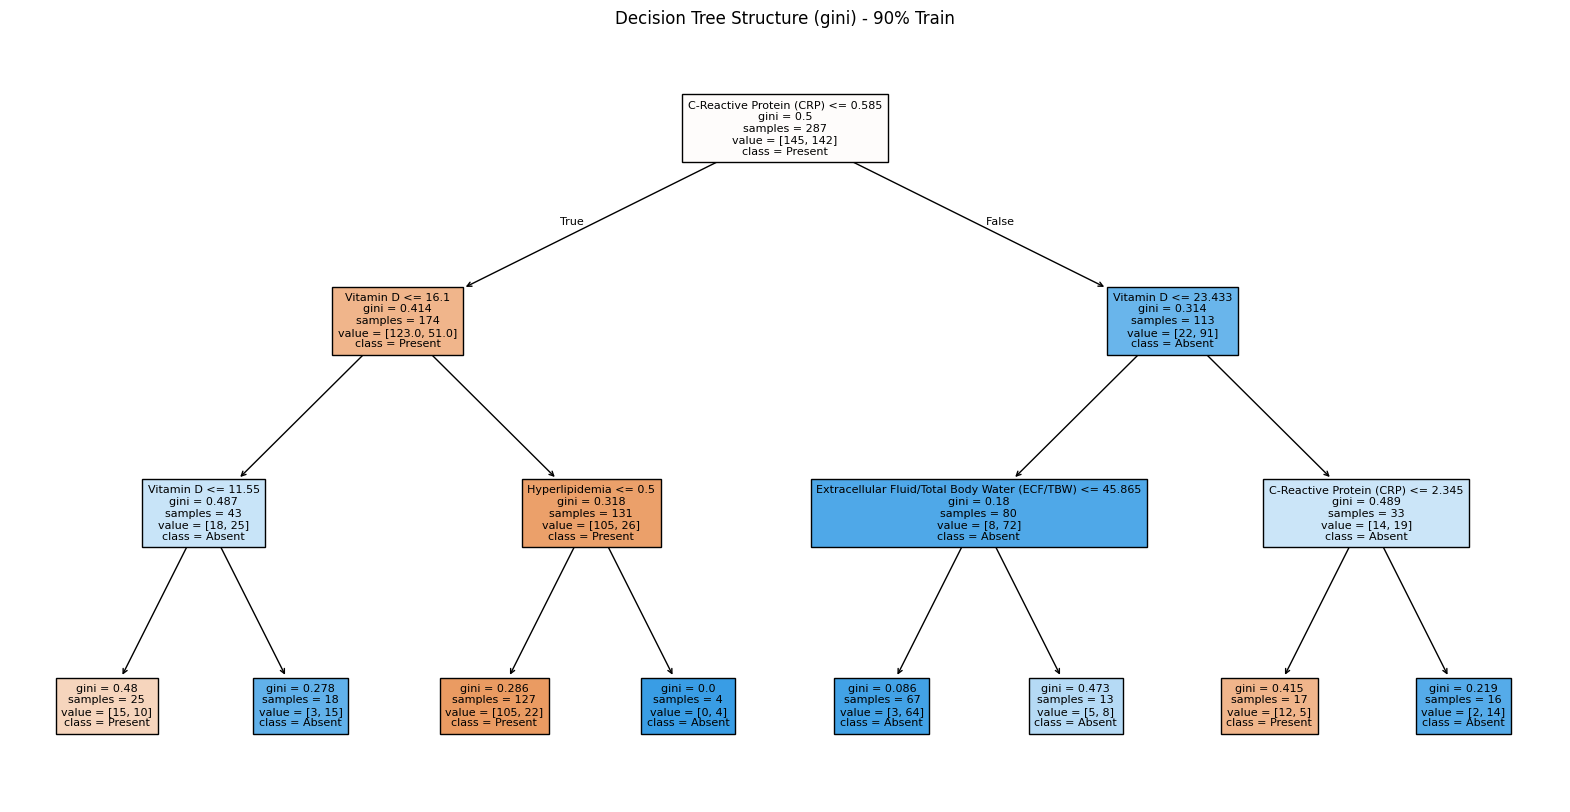

🔹 Split criterion: gini
🔹 Train/Test split: 80% / 20%
✅ Accuracy: 0.656
🧾 Confusion Matrix:
 [[28  5]
 [17 14]]
------------------------------------------------------------


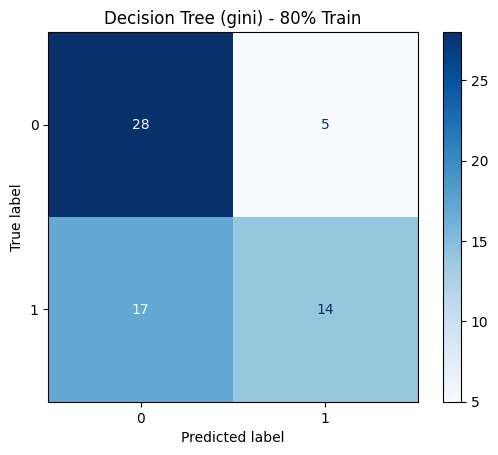

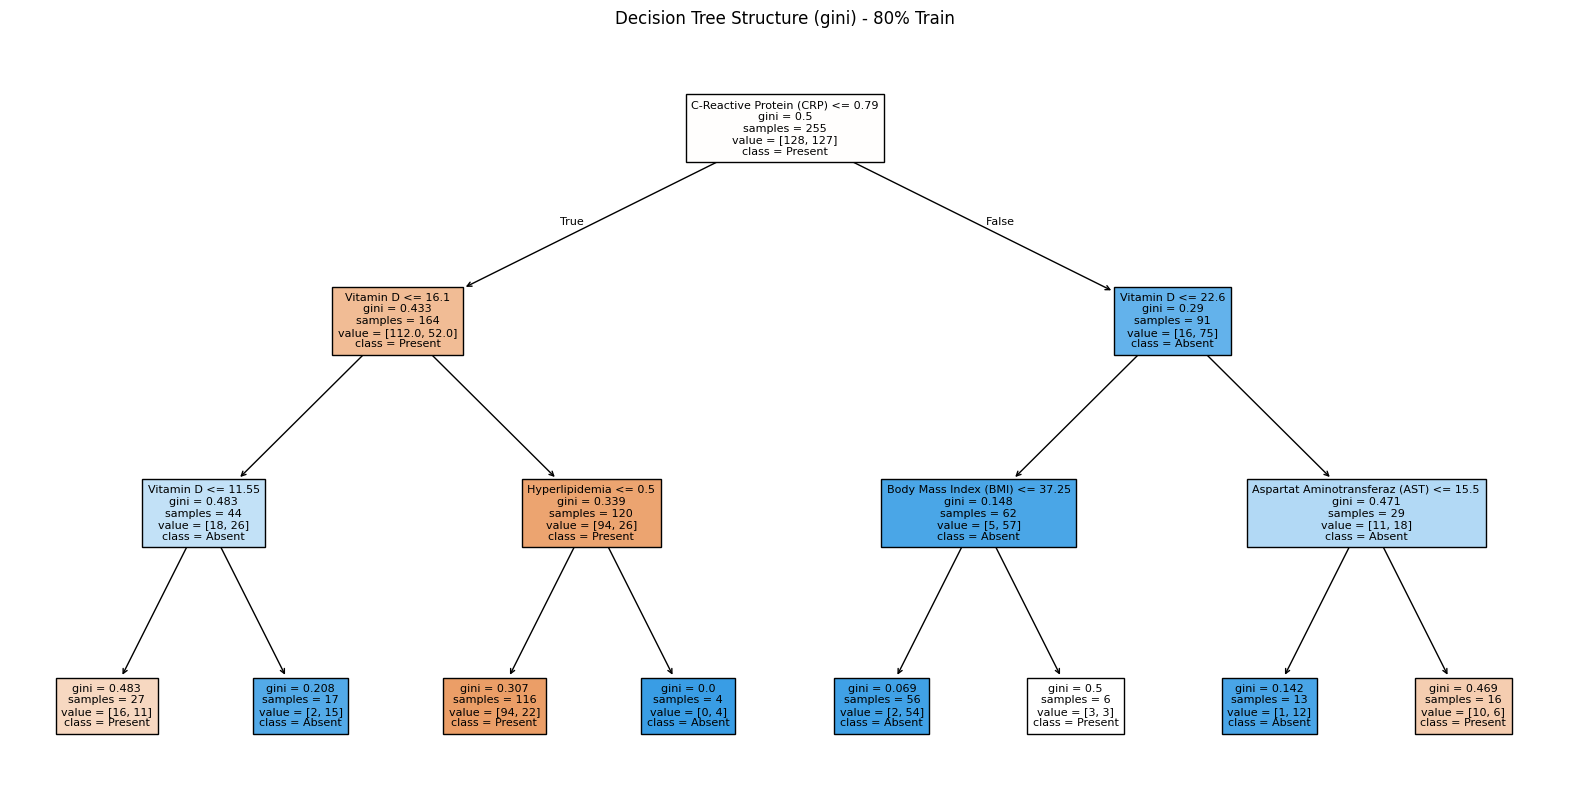

🔹 Split criterion: gini
🔹 Train/Test split: 70% / 30%
✅ Accuracy: 0.760
🧾 Confusion Matrix:
 [[39 11]
 [12 34]]
------------------------------------------------------------


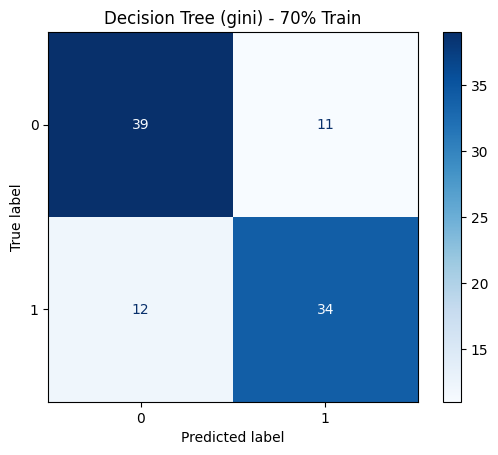

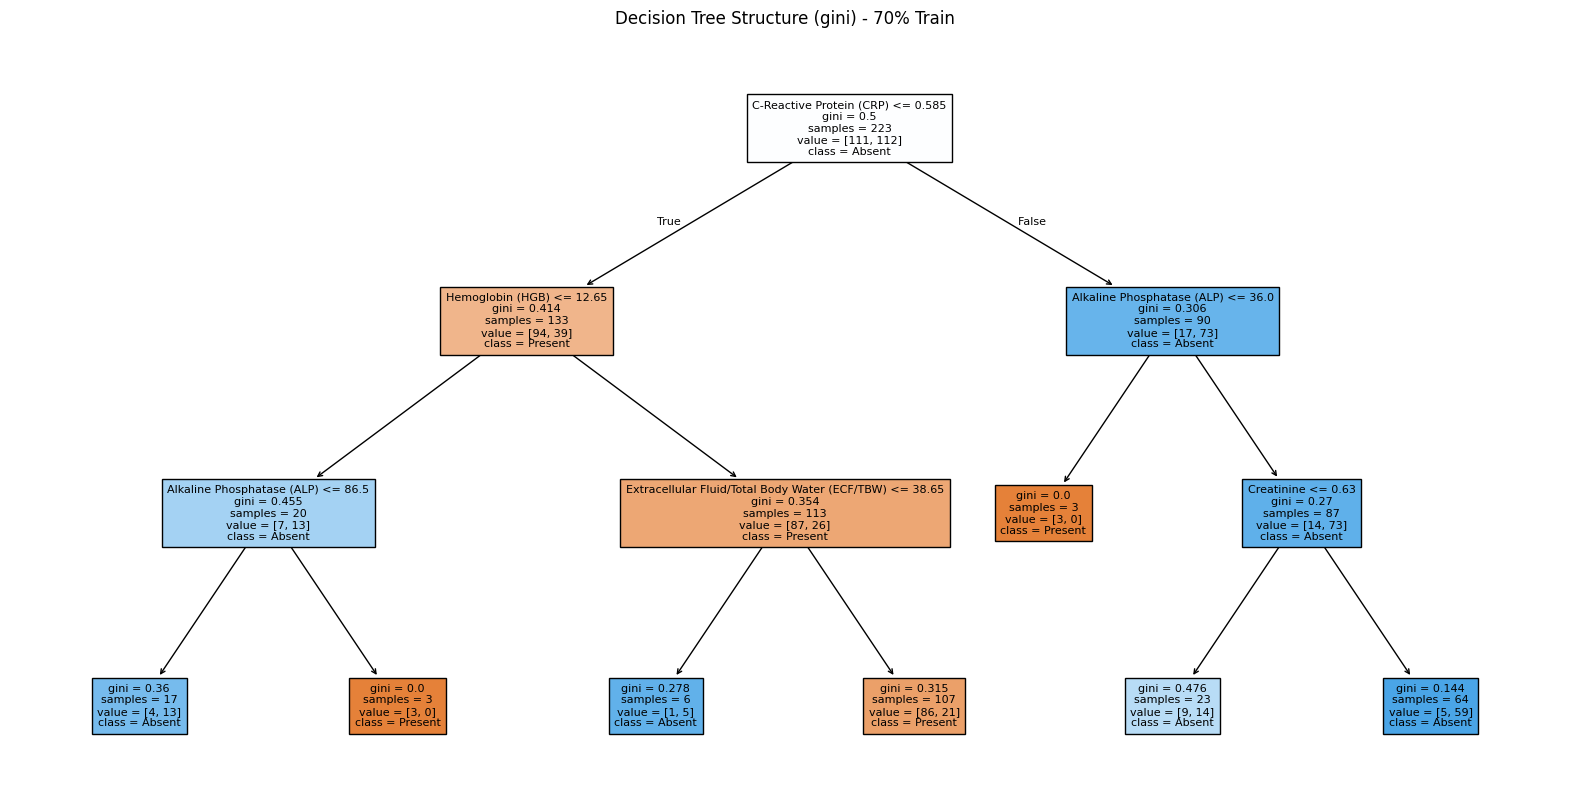

🔹 Split criterion: entropy
🔹 Train/Test split: 90% / 10%
✅ Accuracy: 0.656
🧾 Confusion Matrix:
 [[12  4]
 [ 7  9]]
------------------------------------------------------------


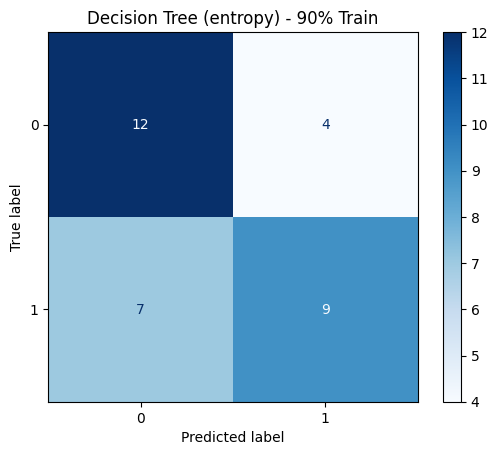

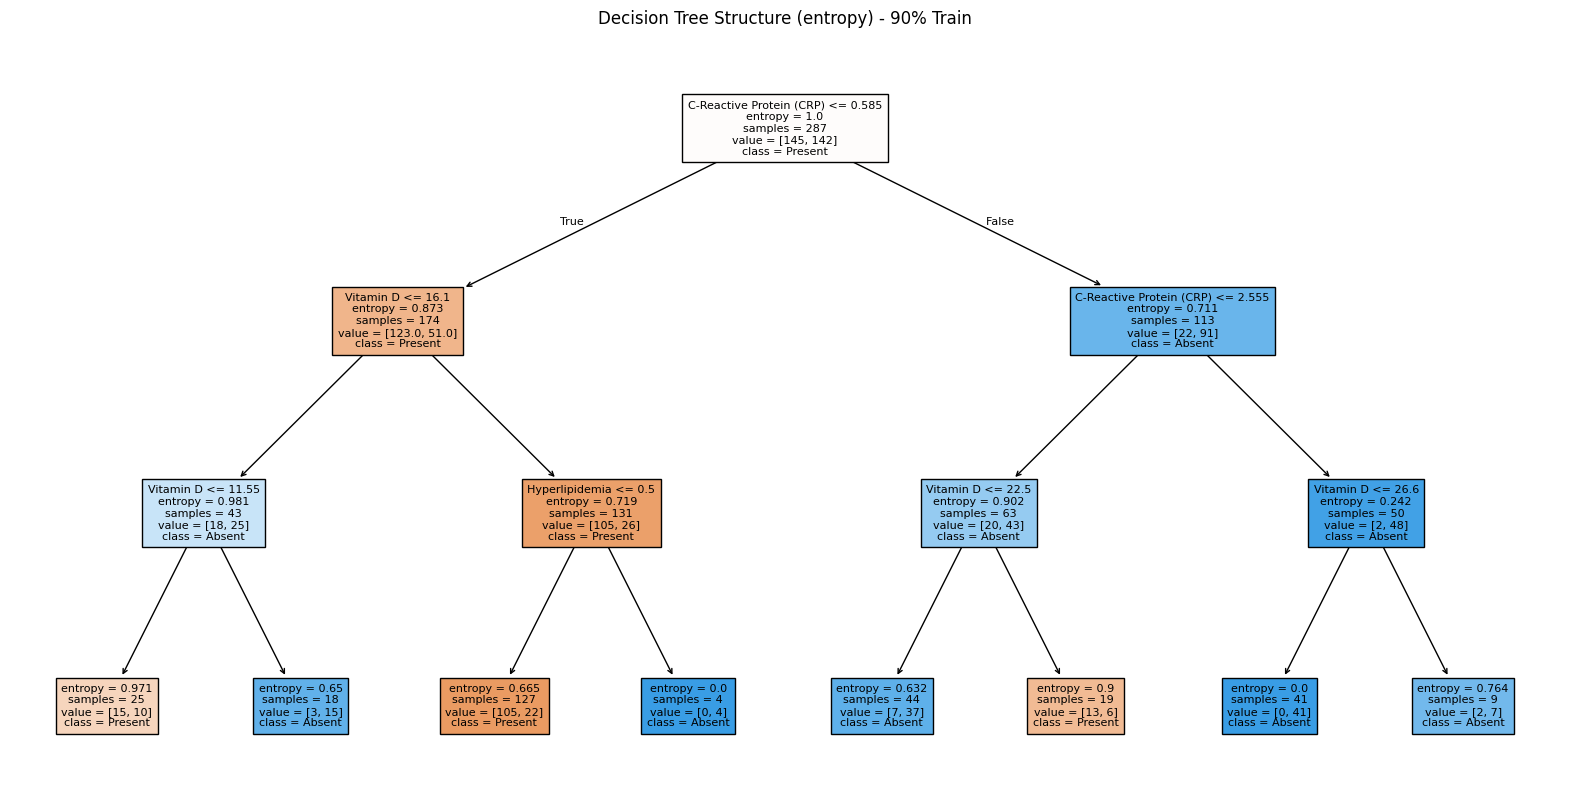

🔹 Split criterion: entropy
🔹 Train/Test split: 80% / 20%
✅ Accuracy: 0.734
🧾 Confusion Matrix:
 [[27  6]
 [11 20]]
------------------------------------------------------------


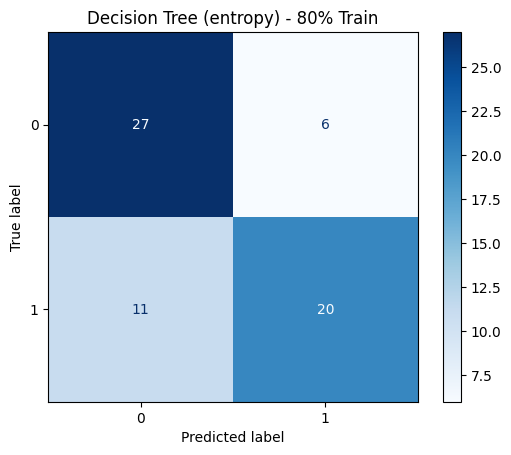

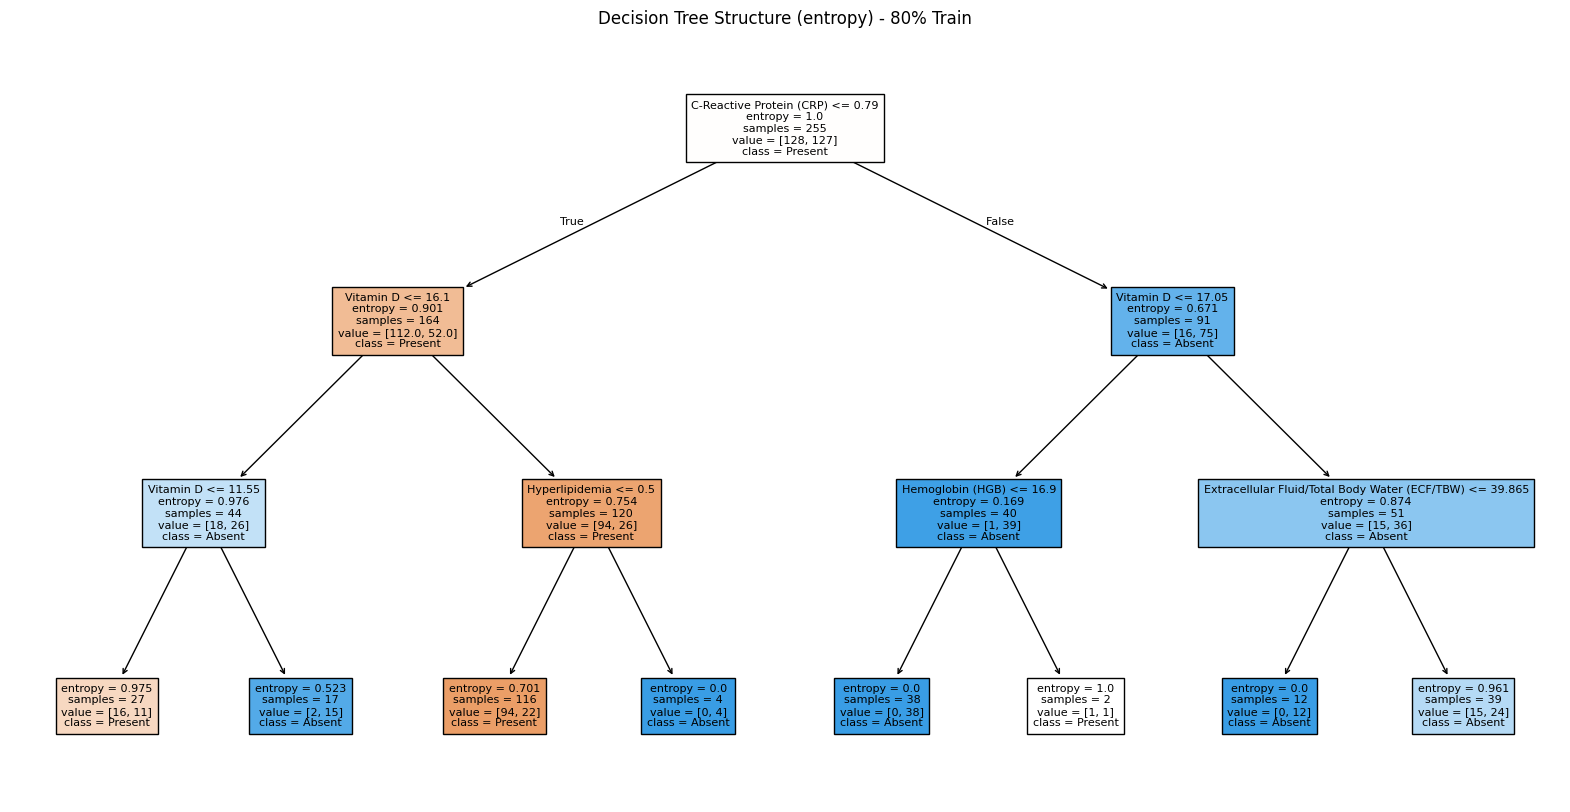

🔹 Split criterion: entropy
🔹 Train/Test split: 70% / 30%
✅ Accuracy: 0.740
🧾 Confusion Matrix:
 [[41  9]
 [16 30]]
------------------------------------------------------------


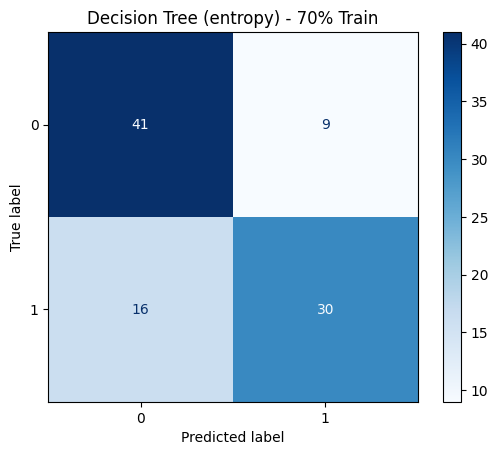

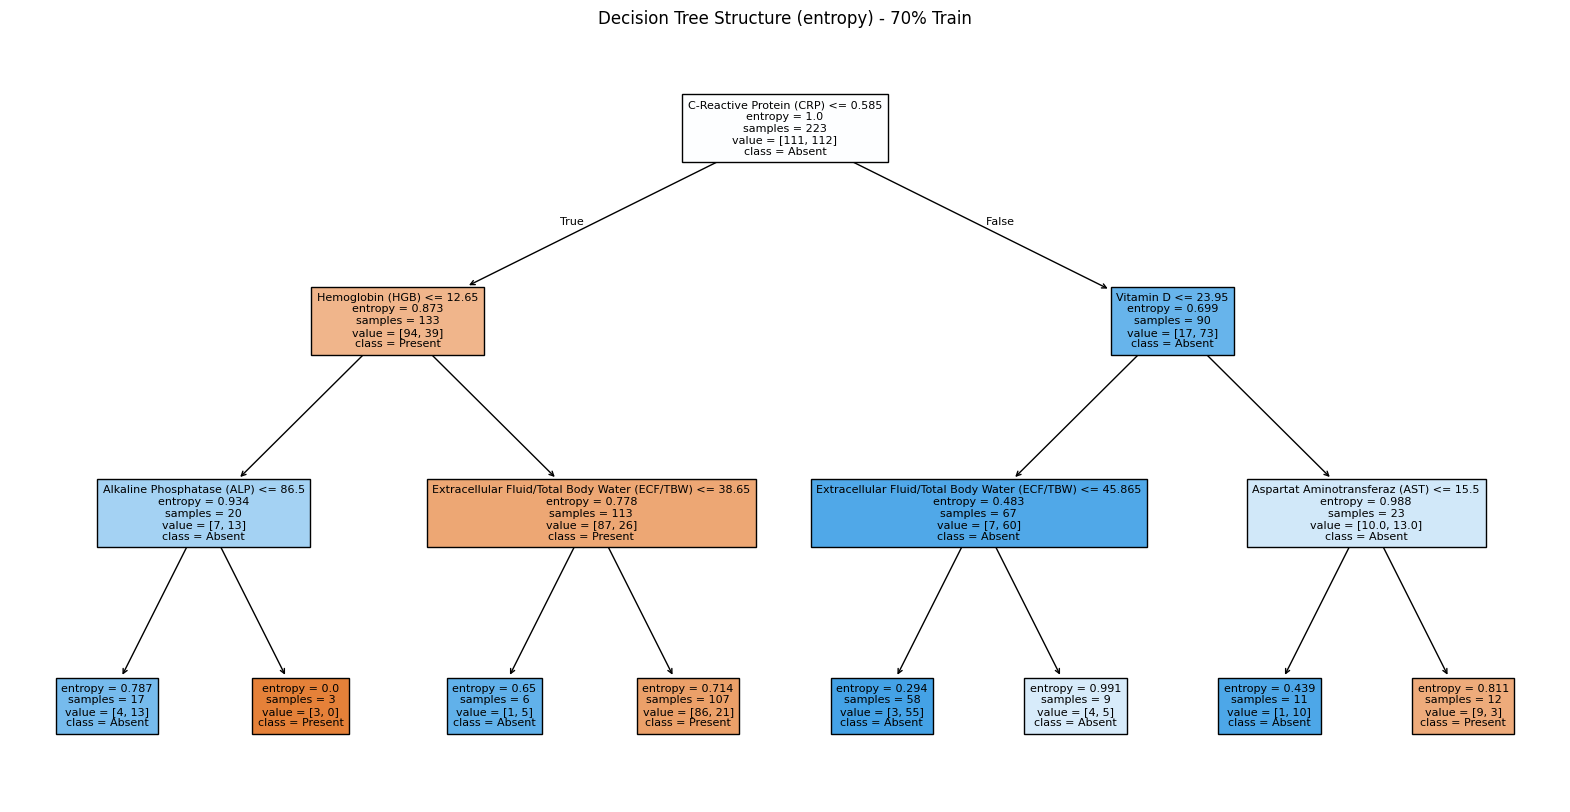

In [21]:
# Step 4: Define features (X) and target (y)
df = pd.read_csv("dataset-uci.csv")
X = df.drop("Gallstone Status", axis=1)
y = df["Gallstone Status"]

splits = [0.1, 0.2, 0.3]
criteria = ["gini", "entropy"]

gini_accuracies = {}
entropy_accuracies = {}

for crit in criteria:
    for s in splits:
        acc = run_decision_tree(X, y, test_size=s, criterion=crit)
        if crit == "gini":
            # Store accuracies based on the percentage of training data
            gini_accuracies[f"split_{int((1-s)*100)}"] = acc
        else:
            entropy_accuracies[f"split_{int((1-s)*100)}"] = acc

# Assign accuracies to specific variables used in the comparison table
gini70_acc = gini_accuracies["split_70"]
gini80_acc = gini_accuracies["split_80"]
gini90_acc = gini_accuracies["split_90"]

ent70_acc = entropy_accuracies["split_70"]
ent80_acc = entropy_accuracies["split_80"]
ent90_acc = entropy_accuracies["split_90"]


In [9]:
# Step 5: Save the dataset
df.to_csv("Preprocessed_dataset.csv", index=False)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
# ============================================================
# Step 6: K-Means Clustering
# ============================================================

# 1) Load preprocessed data
df = pd.read_csv('Preprocessed_dataset.csv')


In [13]:

# 2) Use features only (drop label column if present)
LABEL_COL = 'Gallstone Status'   # change if different / or set to None
X = df.drop(columns=[LABEL_COL], errors='ignore')

# 3) Numeric columns only + standardize (required for K-Means)
X_num = X.select_dtypes(include=[np.number]).copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num.values)

# 4) Evaluate K values (Silhouette + WCSS) — keep it small and clear
k_values = [2, 3, 4]
sil_scores, wcss = [], []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
    wcss.append(km.inertia_)
    print(f"K={k} | Silhouette={sil_scores[-1]:.3f} | WCSS={wcss[-1]:.1f}")


K=2 | Silhouette=0.202 | WCSS=9739.2
K=3 | Silhouette=0.145 | WCSS=8884.7
K=4 | Silhouette=0.128 | WCSS=8182.1


,K,Silhouette,WCSS
0,2,0.202,9739.2
1,3,0.145,8884.7
2,4,0.128,8182.1


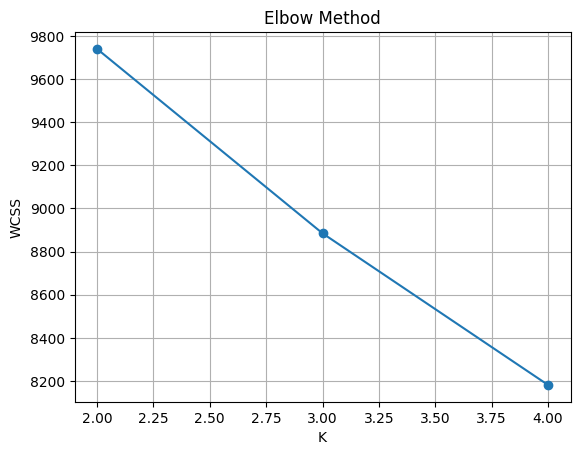

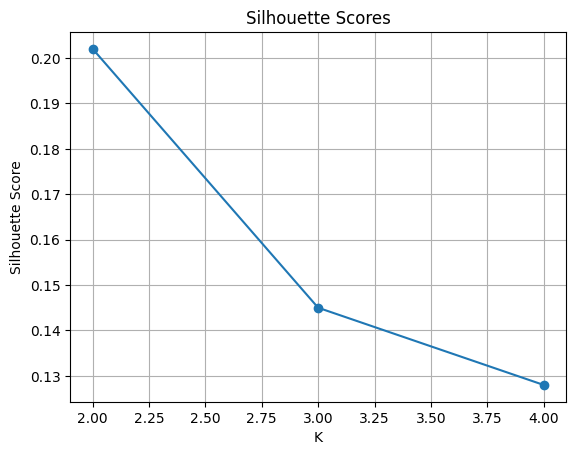

In [14]:

# 5) Results table
results = pd.DataFrame(
    {'K': k_values, 'Silhouette': np.round(sil_scores, 3), 'WCSS': np.round(wcss, 1)}
).sort_values('K').reset_index(drop=True)
display(results)

# 6) Elbow curve (WCSS) — simple plot
plt.figure()
plt.plot(results['K'], results['WCSS'], marker='o')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# 7) Silhouette curve — simple plot
plt.figure()
plt.plot(results['K'], results['Silhouette'], marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.grid(True)
plt.show()



Best K (highest Silhouette) = 2


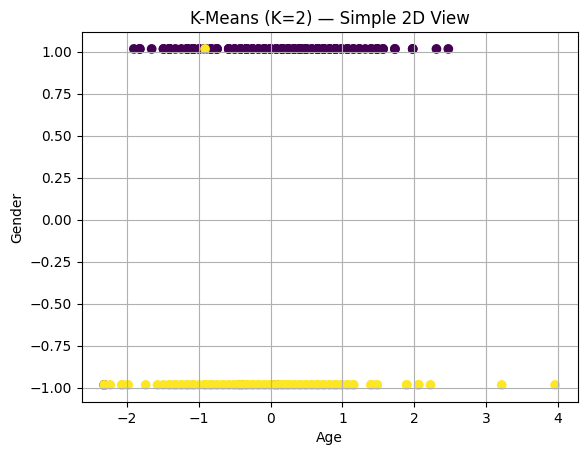

In [15]:

# 8) Pick best K (highest Silhouette) — simple rule
best_k = int(results.iloc[int(np.argmax(results['Silhouette']))]['K'])
print(f"\nBest K (highest Silhouette) = {best_k}")

# 9) Fit final K-Means and add labels to the dataset
final_km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = final_km.fit_predict(X_scaled)
df[f'Cluster_K{best_k}'] = final_labels

# 10) Very simple 2D view (first two numeric features only to keep it minimal)
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_labels)
plt.xlabel(X_num.columns[0])
plt.ylabel(X_num.columns[1])
plt.title(f'K-Means (K={best_k}) — Simple 2D View')
plt.grid(True)
plt.show()


In [16]:

# 11) Quick checks for the report
print("\nCluster counts:")
print(df[f'Cluster_K{best_k}'].value_counts().sort_index())

display(df.head())

# 12) (Optional) Save with cluster labels if you want to use it later
# df.to_csv('Reports/kmeans_output_with_labels.csv', index=False)

# 13) Short summary lines you can reference in Findings
print("\nSummary:")
print(f"- Tested K: {k_values}")
print(f"- Chosen K: {best_k} (highest Silhouette)")
print("- Report both Silhouette (separation quality) and WCSS (compactness), and reference the two plots.")



Cluster counts:
Cluster_K2
0    158
1    161
Name: count, dtype: int64


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D,Cluster_K2
0,0,50,0,0,0,0,0,0,185,92.8,...,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0,1
1,0,47,0,1,0,0,0,0,176,94.5,...,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0,1
2,0,61,0,0,0,0,0,0,171,91.1,...,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2,1
3,0,41,0,0,0,0,0,0,168,67.7,...,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4,1
4,0,42,0,0,0,0,0,0,178,89.6,...,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6,1



Summary:
- Tested K: [2, 3, 4]
- Chosen K: 2 (highest Silhouette)
- Report both Silhouette (separation quality) and WCSS (compactness), and reference the two plots.


In [17]:
import pandas as pd

dt_results = pd.DataFrame({
    "Train/Test Split": ["70/30", "80/20", "90/10", "70/30", "80/20", "90/10"],
    "Criterion": ["Gini", "Gini", "Gini", "Entropy", "Entropy", "Entropy"],
    "Accuracy": [gini70_acc, gini80_acc, gini90_acc, ent70_acc, ent80_acc, ent90_acc]
})

print("📌 Decision Tree – Comparison Table:")
dt_results


📌 Decision Tree – Comparison Table:


,Train/Test Split,Criterion,Accuracy
0,70/30,Gini,0.760417
1,80/20,Gini,0.656250
2,90/10,Gini,0.656250
3,70/30,Entropy,0.739583
4,80/20,Entropy,0.734375
5,90/10,Entropy,0.656250


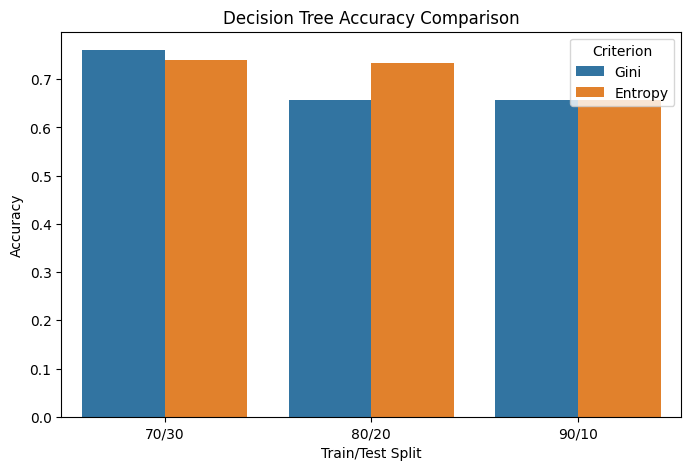

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=dt_results, x="Train/Test Split", y="Accuracy", hue="Criterion")
plt.title("Decision Tree Accuracy Comparison")
plt.show()


In [23]:
sil2 = sil_scores[0]
sil3 = sil_scores[1]
sil4 = sil_scores[2]
wcss2 = wcss[0]
wcss3 = wcss[1]
wcss4 = wcss[2]

kmeans_results = pd.DataFrame({
    "K value": [2, 3, 4],
    "Silhouette Score": [sil2, sil3, sil4],
    "WCSS": [wcss2, wcss3, wcss4]
})

print("📌 K-Means – Comparison Table:")
kmeans_results

📌 K-Means – Comparison Table:


,K value,Silhouette Score,WCSS
0,2,0.201779,9739.206314
1,3,0.144939,8884.674159
2,4,0.127742,8182.143184


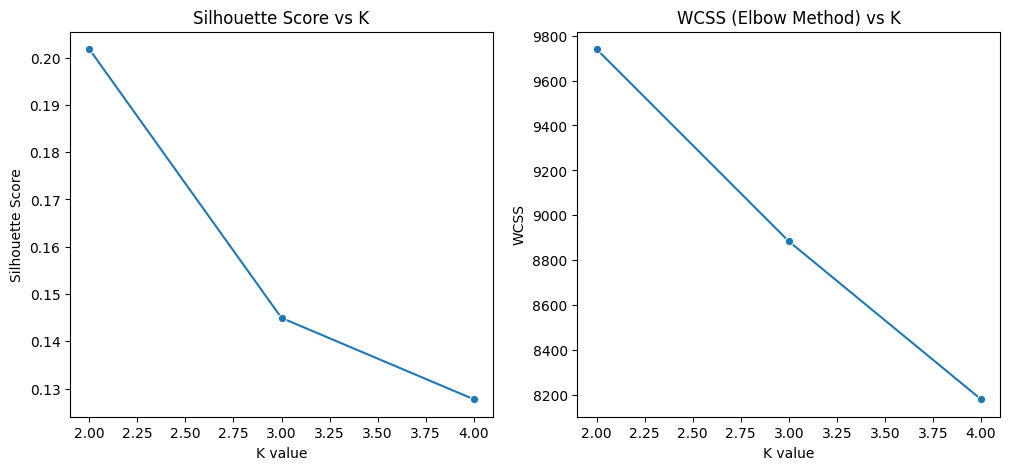

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.lineplot(ax=ax[0], data=kmeans_results, x="K value", y="Silhouette Score", marker="o")
ax[0].set_title("Silhouette Score vs K")

sns.lineplot(ax=ax[1], data=kmeans_results, x="K value", y="WCSS", marker="o")
ax[1].set_title("WCSS (Elbow Method) vs K")

plt.show()
